# <u>Linear Regression on Boston Housing Dataset</u>

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sc
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
%matplotlib inline

### Loading our dataset into our dataframe

In [2]:
df=pd.read_csv("./boston_h_d.csv")

### Understanding the data

In [3]:
# crim
# per capita crime rate by town.
# zn
# proportion of residential land zoned for lots over 25,000 sq.ft.
# indus
# proportion of non-retail business acres per town.
# chas
# Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# nox
# nitrogen oxides concentration (parts per 10 million).
# rm
# average number of rooms per dwelling.
# age
# proportion of owner-occupied units built prior to 1940.
# dis
# weighted mean of distances to five Boston employment centres.
# rad
# index of accessibility to radial highways.
# tax
# full-value property-tax rate per $10,000.
# ptratio
# pupil-teacher ratio by town.
# black
# 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# lstat
# lower status of the population (percent).
# medv
# median value of owner-occupied homes in $1000s.

In [4]:
df.dtypes #our values are mostly floats

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
B             float64
LSTAT         float64
target        float64
dtype: object

In [5]:
df.head() # we can see that we have an extra column (column 0) which needs to be dropped.

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()#from the info function we understand that we dont have any null values which are present in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
CRIM          506 non-null float64
ZN            506 non-null float64
INDUS         506 non-null float64
CHAS          506 non-null float64
NOX           506 non-null float64
RM            506 non-null float64
AGE           506 non-null float64
DIS           506 non-null float64
RAD           506 non-null float64
TAX           506 non-null float64
PTRATIO       506 non-null float64
B             506 non-null float64
LSTAT         506 non-null float64
target        506 non-null float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [7]:
df.describe()#we can see that the CHAS variable is actually a categorical variable (1/0) values present.

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Building a basic model on the full dataset

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)#dropping the extra column present in our dataset.

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
#building a basic model on the entire dataset to get a starting point .
basic_model = ols("target ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT", data=df).fit()

In [11]:
basic_model.summary() #we can see that R-squared is 0.79 and adjusted is 0.78 
#we will be calculating the rmse mape and accuracy of this model later .

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        10:19:16   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Visualizing and cleaning our dataset

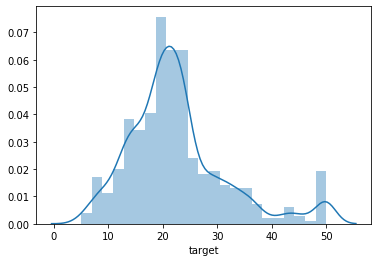

In [12]:
#on visualizing our target variable in this dataset we can understand that we may be having a few outliers present in our taget
#variable which we may need to clean.
sc.distplot(df.target)

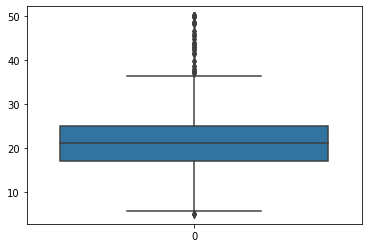

In [13]:
sc.boxplot(data=df.target) #we can see that there are outliers present in our target variable

11.962500000000002 25.0 17.025


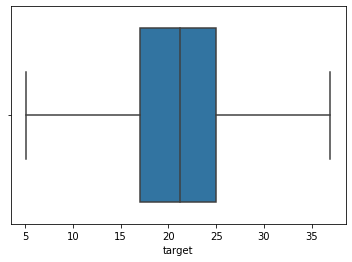

In [14]:
iqr=1.5*(df.target.quantile(0.75)-df.target.quantile(0.25))
q3=df.target.quantile(0.75)
q1=df.target.quantile(0.25)
print(iqr,q3,q1)
df['target']=np.where(df.target<(q1-iqr),(q1-iqr),df.target)
df['target']=np.where(df.target>(q3+iqr),(q3+iqr),df.target)
sc.boxplot(df.target) #we can see that we dont have any outliers present in our target variable anymore

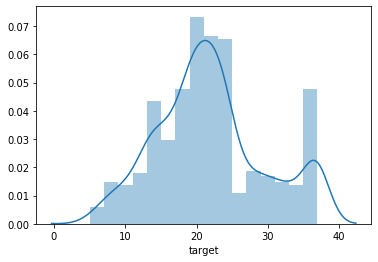

In [15]:
sc.distplot(df.target)

### Understanding which features (variables) we want to use in our model

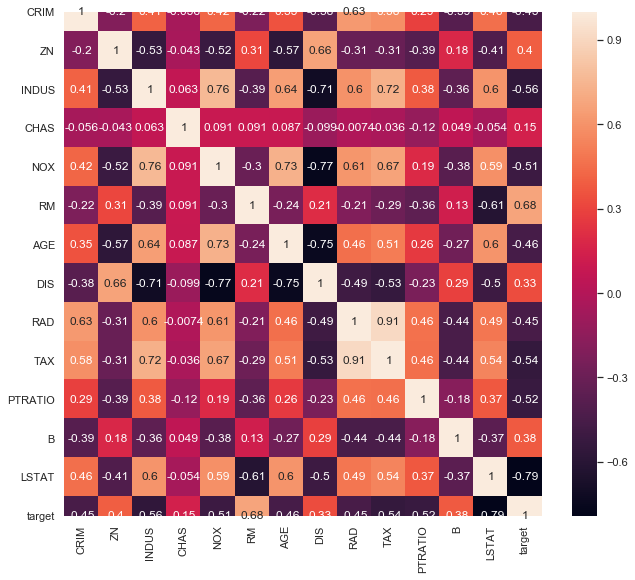

In [16]:
#we want to do two things here first we want to select the variables which are highly correlated with our target variable
#secondly we need also ensure that the independent variables (X's) do not have a very high correlation with each other.
corr_val=df.corr()
sc.set(rc={'figure.figsize':(10.7,9.27)})
sc.heatmap(data=corr_val,annot=True)
#from this graph we can understand that there are two variables which have a very high correlation with our target variable
#LSTAT has a high negative correlation of -0.79
#RM has a high positive correlation of 0.68

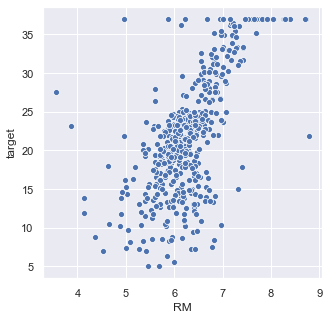

In [17]:
#To further understand the relationship these two variables have with our target variable we need to plot scatterplots of these
#variables with our target
sc.set(rc={'figure.figsize':(5,5)})
sc.scatterplot(x=df.RM,y=df.target,data=df)

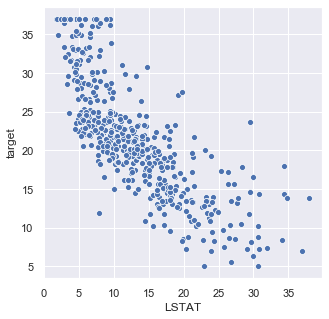

In [18]:
sc.set(rc={'figure.figsize':(5,5)})
sc.scatterplot(x=df.LSTAT,y=df.target,data=df)

### Removing outliers from our highly correlated variables and building our first model

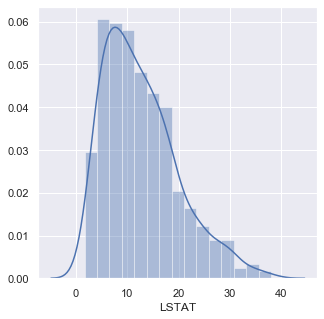

In [19]:
sc.distplot(df.LSTAT)

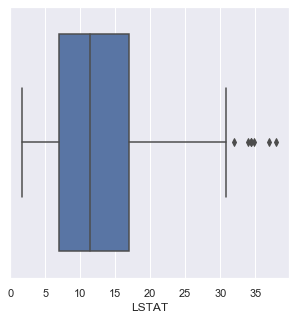

In [20]:
sc.boxplot(df.LSTAT)#we can see the presence of outliers in this case

15.007500000000004 16.955000000000002 6.949999999999999


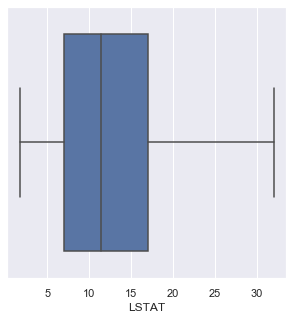

In [21]:
iqr=1.5*(df.LSTAT.quantile(0.75)-df.LSTAT.quantile(0.25))
q3=df.LSTAT.quantile(0.75)
q1=df.LSTAT.quantile(0.25)
print(iqr,q3,q1)

df['LSTAT']=np.where(df.LSTAT<(q1-iqr),(q1-iqr),df.LSTAT)
df['LSTAT']=np.where(df.LSTAT>(q3+iqr),(q3+iqr),df.LSTAT)
sc.boxplot(df.LSTAT)#outlier treatment.

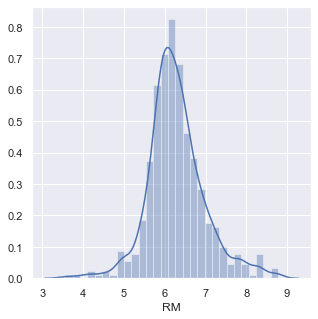

In [22]:
sc.distplot(df.RM)

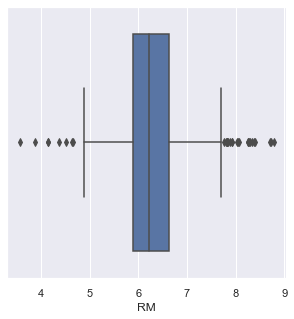

In [23]:
sc.boxplot(df.RM)#outliers present

1.1069999999999993 6.6235 5.8855


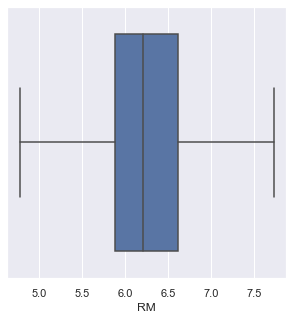

In [24]:
iqr=1.5*(df.RM.quantile(0.75)-df.RM.quantile(0.25))
q3=df.RM.quantile(0.75)
q1=df.RM.quantile(0.25)
print(iqr,q3,q1)
df['RM']=np.where(df.RM<(q1-iqr),(q1-iqr),df.RM)
df['RM']=np.where(df.RM>(q3+iqr),(q3+iqr),df.RM)
sc.boxplot(df.RM)

In [25]:
#basic_model = ols("target ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT", data=df).fit()

In [26]:
model1=ols("target ~ LSTAT+RM",data=df).fit()
model1.summary()#see that now our Rsq and adj Rsq has reduced from before

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     578.9
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          3.38e-131
Time:                        10:19:21   Log-Likelihood:                -1441.7
No. Observations:                 506   AIC:                             2889.
Df Residuals:                     503   BIC:                             2902.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6762      2.706      2.098      0.036       0.360      10.992
LSTAT         -0.6430      0.034    -18.695      0.000      -0.711      -0.575
RM             3.8741      0.383     10.116      0.000       3.122       4.626
==============================================================================
Omnibus:                       28.064   Durbin-Watson:                   0.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.536
Skew:                           0.491   Prob(JB):                     1.92e-08
Kurtosis:                       3.848   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Building our train and test set

In [27]:
X=df.drop('target',axis=1)
Y=df.target
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
train=pd.concat((X_train,Y_train),axis=1)#creating our final training set.
train.shape

(354, 13)
(152, 13)
(354,)
(152,)


(354, 14)

In [28]:
model2=ols("target ~ LSTAT+RM",data=train).fit()
model2.summary()
predicted_values=model2.predict(X_test)
actual_values=Y_test

In [29]:
error=actual_values-predicted_values
rmse=np.sqrt(np.mean(error**2))
mape=np.mean(abs((actual_values-predicted_values)/actual_values))*100
accuracy=100-mape
print(rmse,mape,accuracy)

4.1735039306369215 17.495605353445463 82.50439464655454


In [30]:
#let us look at the basic model we had built
predicted_values=basic_model.predict(X_test)
actual_values=Y_test
error=actual_values-predicted_values
rmse=np.sqrt(np.mean(error**2))
mape=np.mean(abs((actual_values-predicted_values)/actual_values))*100
accuracy=100-mape
print(rmse,mape,accuracy)

3.7566230420228903 15.279523885599943 84.72047611440006


In [31]:
#we can also calc the rmse in this manner.
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(actual_values,predicted_values)))
print(rmse)

3.7566230420228903


###  Selecting other variables which are not highly correlated with our target

In [32]:
#we need to now select variables which are not only correlated with our target but we also need to ensure that the variables do 
#not have high multicollinearity with each other
#if we go back to the heatmap we created we can see that there are many dependent variables which have high correlation with each
#other
#nox & indus,rad & age,age &dist etc.

In [33]:
#tax and rad have high correlation
model3=ols("target~LSTAT+RM+TAX",data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     312.9
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           1.10e-98
Time:                        10:19:21   Log-Likelihood:                -989.17
No. Observations:                 354   AIC:                             1986.
Df Residuals:                     350   BIC:                             2002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5328      3.096      2.110      0.036       0.444      12.622
LSTAT         -0.5106      0.045    -11.442      0.000      -0.598      -0.423
RM             4.1013      0.443      9.253      0.000       3.230       4.973
TAX           -0.0097      0.002     -6.435      0.000      -0.013      -0.007
==============================================================================
Omnibus:                       20.083   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.455
Skew:                           0.492   Prob(JB):                     4.89e-06
Kurtosis:                       3.830   Cond. No.                     6.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
predicted_values=model3.predict(X_test)
actual_values=Y_test
error=actual_values-predicted_values
rmse=np.sqrt(np.mean(error**2))
mape=np.mean(abs((actual_values-predicted_values)/actual_values))*100
accuracy=100-mape
print(rmse,mape,accuracy)

4.187761699256622 16.354647626674097 83.6453523733259


In [ ]:
#here we can see a trade-off between the rmse value and the accuracy value of model2 and model3

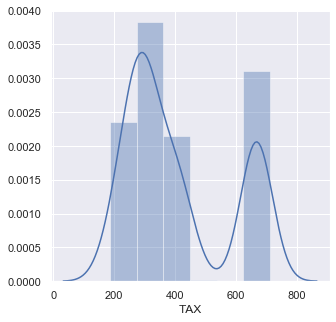

In [36]:
sc.distplot(df.TAX)

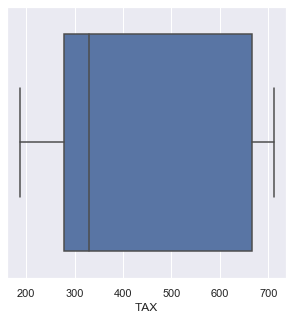

In [37]:
sc.boxplot(df.TAX)

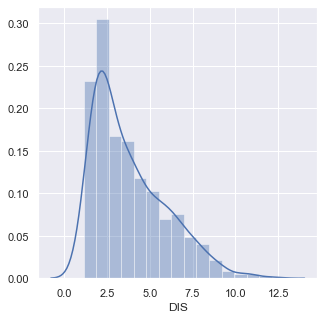

In [38]:
#next highly correlated independent variable pair is dis and age
sc.distplot(df.DIS)

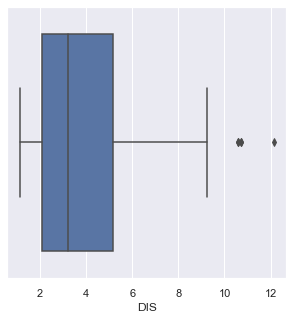

In [39]:
sc.boxplot(df.DIS)

In [42]:
#lets build a model before handling the outliers and then another one after handling the outliers.
model4=ols("target~RM+LSTAT+TAX+DIS",data=train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     244.8
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          6.67e-100
Time:                        10:32:12   Log-Likelihood:                -983.31
No. Observations:                 354   AIC:                             1977.
Df Residuals:                     349   BIC:                             1996.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5424      3.267      3.227      0.001       4.118      16.967
RM             3.9444      0.439      8.985      0.000       3.081       4.808
LSTAT         -0.5569      0.046    -12.110      0.000      -0.647      -0.466
TAX           -0.0116      0.002     -7.320      0.000      -0.015      -0.009
DIS           -0.4360      0.127     -3.426      0.001      -0.686      -0.186
==============================================================================
Omnibus:                       17.183   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.210
Skew:                           0.411   Prob(JB):                     1.50e-05
Kurtosis:                       3.911   Cond. No.                     6.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
predicted_values=model4.predict(X_test)
actual_values=Y_test
error=actual_values-predicted_values
rmse=np.sqrt(np.mean(error**2))
mape=np.mean(abs((actual_values-predicted_values)/actual_values))*100
accuracy=100-mape
print(rmse,mape,accuracy)

4.0766466545529445 16.129841015152973 83.87015898484702


In [49]:
iqr=1.5*(train.DIS.quantile(0.75)-train.DIS.quantile(0.25))
q3=train.DIS.quantile(0.75)
q1=train.DIS.quantile(0.25)
print(iqr,q3,q1)

4.505962500000001 5.117675 2.1136999999999997


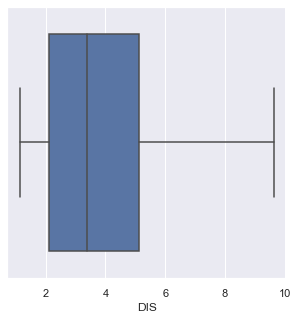

In [50]:
train['DIS']=np.where(train.DIS<(q1-iqr),(q1-iqr),train.DIS)
train['DIS']=np.where(train.DIS>(q3+iqr),(q3+iqr),train.DIS)
sc.boxplot(train.DIS)

In [51]:
model5=ols("target~RM+LSTAT+DIS+TAX",data=train).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     244.6
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          7.41e-100
Time:                        10:53:04   Log-Likelihood:                -983.42
No. Observations:                 354   AIC:                             1977.
Df Residuals:                     349   BIC:                             1996.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4861      3.265      3.211      0.001       4.064      16.908
RM             3.9524      0.439      9.005      0.000       3.089       4.816
LSTAT         -0.5562      0.046    -12.098      0.000      -0.647      -0.466
DIS           -0.4367      0.129     -3.394      0.001      -0.690      -0.184
TAX           -0.0117      0.002     -7.310      0.000      -0.015      -0.009
==============================================================================
Omnibus:                       17.195   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.203
Skew:                           0.412   Prob(JB):                     1.51e-05
Kurtosis:                       3.910   Cond. No.                     6.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
predicted_values=model5.predict(X_test)
actual_values=Y_test
error=actual_values-predicted_values
rmse=np.sqrt(np.mean(error**2))
mape=np.mean(abs((actual_values-predicted_values)/actual_values))*100
accuracy=100-mape
print(rmse,mape,accuracy)

4.076704283614109 16.125252035871547 83.87474796412846


In [56]:
train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

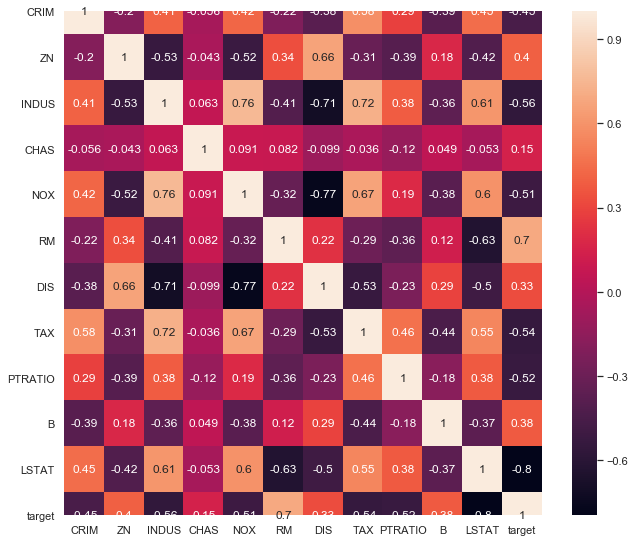

In [65]:
#we know that we dont need to keep the RAD variable and the age variable anymore
corr_vals=df.loc[:,['CRIM','ZN','INDUS','CHAS','NOX','RM','DIS','TAX','PTRATIO','B','LSTAT','target']].corr()
sc.set(rc={'figure.figsize':(10.7,9.27)})
sc.heatmap(corr_vals,annot=True)
#new correlation matrix 

In [ ]:
#next nox has a high correlation with both dis as well as indus aswell as with tax so we will not use the nox parameter here.

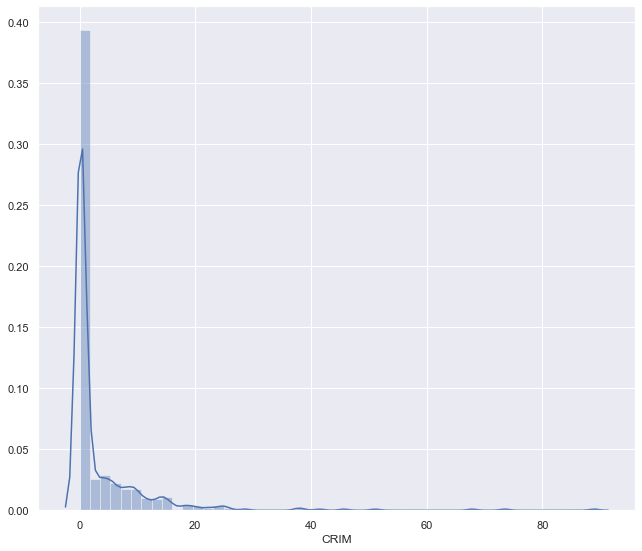

In [66]:
#CRIM variable
sc.distplot(df.CRIM)

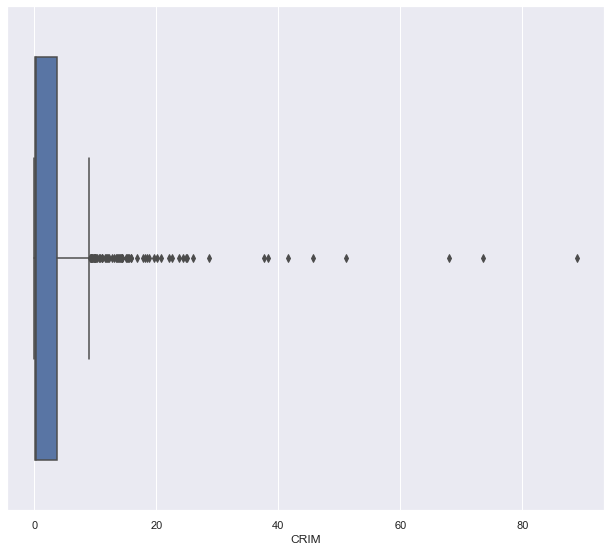

In [67]:
sc.boxplot(df.CRIM)

In [68]:
iqr=1.5*(train.CRIM.quantile(0.75)-train.CRIM.quantile(0.25))
q3=train.CRIM.quantile(0.75)
q1=train.CRIM.quantile(0.25)
print(iqr,q3,q1)

5.392222499999999 3.6770824999999996 0.08226750000000001


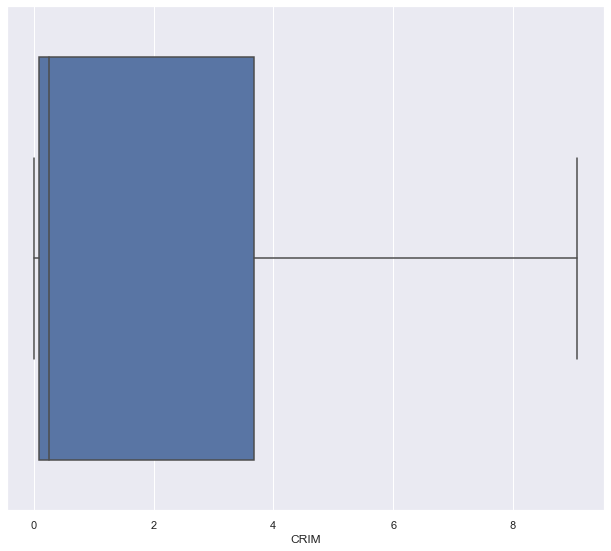

In [69]:
train['CRIM']=np.where(train.CRIM<(q1-iqr),(q1-iqr),train.CRIM)
train['CRIM']=np.where(train.CRIM>(q3+iqr),(q3+iqr),train.CRIM)
sc.boxplot(train.CRIM)

In [70]:
model6=ols("target~RM+LSTAT+TAX+DIS+CRIM",data=train).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     198.0
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           1.92e-99
Time:                        11:25:09   Log-Likelihood:                -981.52
No. Observations:                 354   AIC:                             1975.
Df Residuals:                     348   BIC:                             1998.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7649      3.543      2.192      0.029       0.797      14.733
RM             4.1718      0.452      9.237      0.000       3.284       5.060
LSTAT         -0.5188      0.050    -10.436      0.000      -0.617      -0.421
TAX           -0.0077      0.003     -2.998      0.003      -0.013      -0.003
DIS           -0.4647      0.129     -3.603      0.000      -0.718      -0.211
CRIM          -0.2789      0.144     -1.937      0.054      -0.562       0.004
==============================================================================
Omnibus:                       22.610   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.470
Skew:                           0.483   Prob(JB):                     1.47e-07
Kurtosis:                       4.096   Cond. No.                     7.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
predicted_values=model6.predict(X_test)
actual_values=Y_test
error=actual_values-predicted_values
rmse=np.sqrt(np.mean(error**2))
mape=np.mean(abs((actual_values-predicted_values)/actual_values))*100
accuracy=100-mape
print(rmse,mape,accuracy)

4.621958783656038 18.424205396606304 81.57579460339369


In [ ]:
#CRIM VARIABLE  has resulted in reducing the accuracy while incresing the rmse 

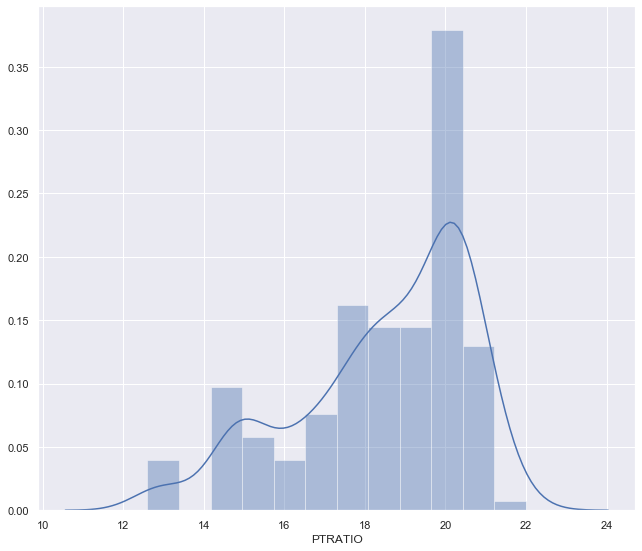

In [72]:
#PTRATIO
sc.distplot(train.PTRATIO)

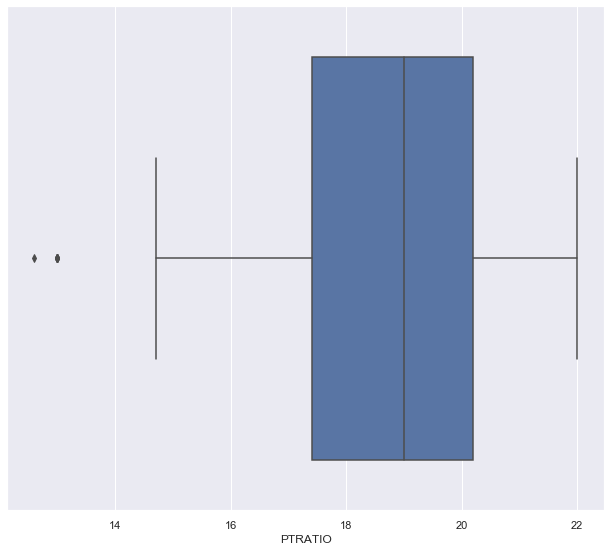

In [73]:
sc.boxplot(train.PTRATIO)

In [74]:
iqr=1.5*(train.PTRATIO.quantile(0.75)-train.PTRATIO.quantile(0.25))
q3=train.PTRATIO.quantile(0.75)
q1=train.PTRATIO.quantile(0.25)
print(iqr,q3,q1)

4.200000000000001 20.2 17.4


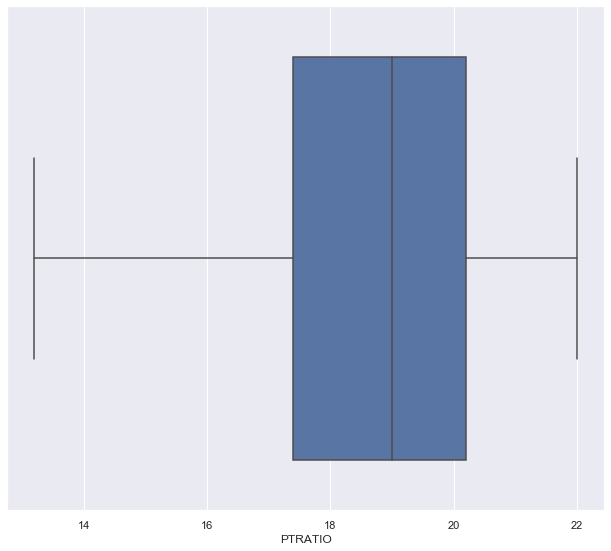

In [75]:
train['PTRATIO']=np.where(train.PTRATIO<(q1-iqr),(q1-iqr),train.PTRATIO)
train['PTRATIO']=np.where(train.PTRATIO>(q3+iqr),(q3+iqr),train.PTRATIO)
sc.boxplot(train.PTRATIO)

In [76]:
model7=ols("target~RM+LSTAT+TAX+DIS+PTRATIO",data=train).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     231.2
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          2.99e-108
Time:                        12:07:36   Log-Likelihood:                -960.83
No. Observations:                 354   AIC:                             1934.
Df Residuals:                     348   BIC:                             1957.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0159      3.808      6.831      0.000      18.526      33.506
RM             3.3443      0.422      7.930      0.000       2.515       4.174
LSTAT         -0.5482      0.043    -12.686      0.000      -0.633      -0.463
TAX           -0.0075      0.002     -4.608      0.000      -0.011      -0.004
DIS           -0.3450      0.122     -2.837      0.005      -0.584      -0.106
PTRATIO       -0.7502      0.109     -6.882      0.000      -0.965      -0.536
==============================================================================
Omnibus:                       27.387   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.419
Skew:                           0.515   Prob(JB):                     3.73e-10
Kurtosis:                       4.372   Cond. No.                     8.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
predicted_values=model7.predict(X_test)
actual_values=Y_test
error=actual_values-predicted_values
rmse=np.sqrt(np.mean(error**2))
mape=np.mean(abs((actual_values-predicted_values)/actual_values))*100
accuracy=100-mape
print(rmse,mape,accuracy)

4.0264351371078355 15.868664230197481 84.13133576980252


In [ ]:
#we can see that instead of using the CRIM variable we are better off using the PTRATIO variable in this case.

In [ ]:
#B variable

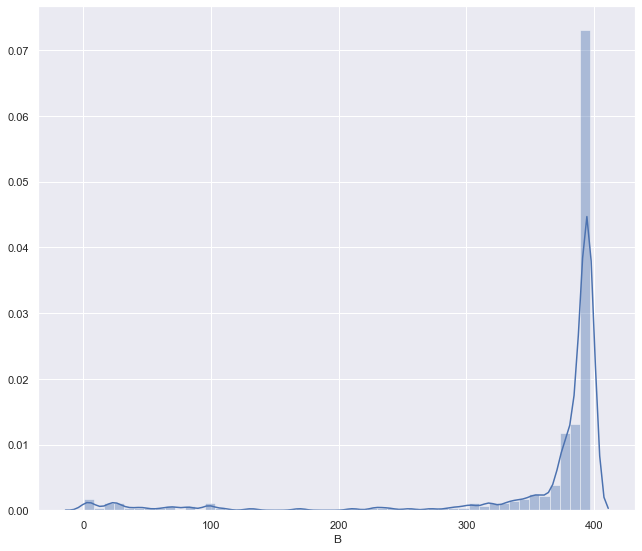

In [78]:
sc.distplot(train.B)

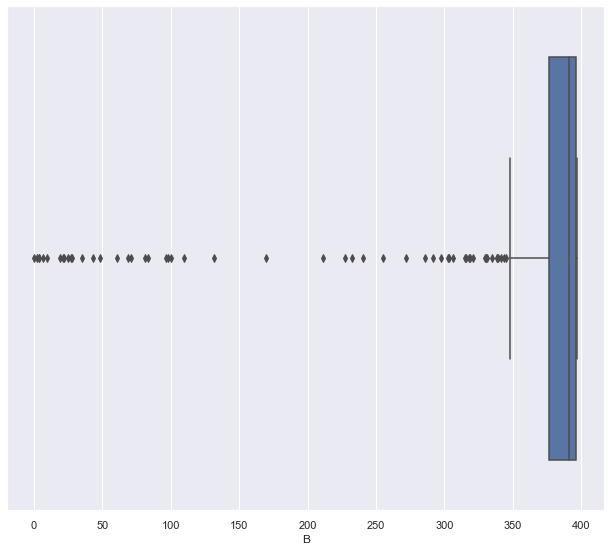

In [79]:
sc.boxplot(train.B)

In [80]:
iqr=1.5*(train.B.quantile(0.75)-train.B.quantile(0.25))
q3=train.B.quantile(0.75)
q1=train.B.quantile(0.25)
print(iqr,q3,q1)

29.384999999999962 396.1925 376.6025


In [92]:
model8=ols("target~RM+LSTAT+TAX+DIS+PTRATIO+B",data=train).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     177.2
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          2.54e-110
Time:                        15:03:21   Log-Likelihood:                -950.34
No. Observations:                 354   AIC:                             1917.
Df Residuals:                     346   BIC:                             1948.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.4386      4.077      4.767      0.000      11.419      27.458
RM             3.5190      0.423      8.310      0.000       2.686       4.352
LSTAT         -0.5131      0.043    -11.948      0.000      -0.598      -0.429
TAX           -0.0064      0.002     -3.823      0.000      -0.010      -0.003
DIS           -0.5500      0.151     -3.632      0.000      -0.848      -0.252
PTRATIO       -0.6621      0.112     -5.891      0.000      -0.883      -0.441
B              0.0098      0.002      4.025      0.000       0.005       0.015
ZN             0.0260      0.012      2.136      0.033       0.002       0.050
==============================================================================
Omnibus:                       31.398   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.567
Skew:                           0.515   Prob(JB):                     1.16e-13
Kurtosis:                       4.726   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
predicted_values=model8.predict(X_test)
actual_values=Y_test
error=actual_values-predicted_values
rmse=np.sqrt(np.mean(error**2))
mape=np.mean(abs((actual_values-predicted_values)/actual_values))*100
accuracy=100-mape
print(rmse,mape,accuracy)

3.9198472901971333 14.91065058408967 85.08934941591033


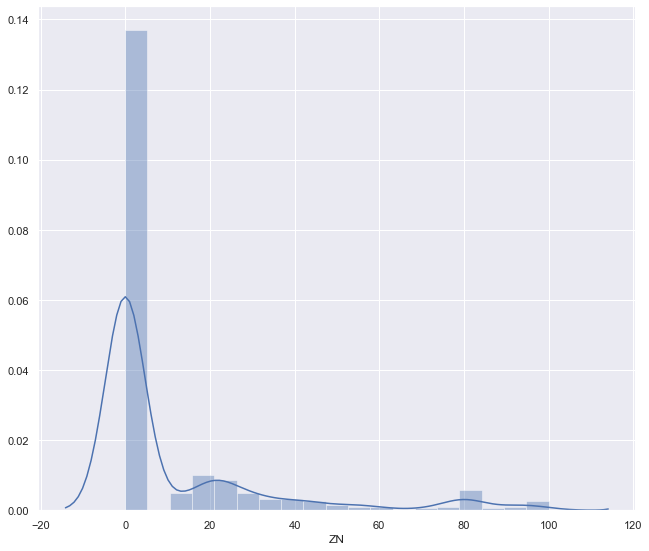

In [87]:
#ZN variable
sc.distplot(train.ZN)

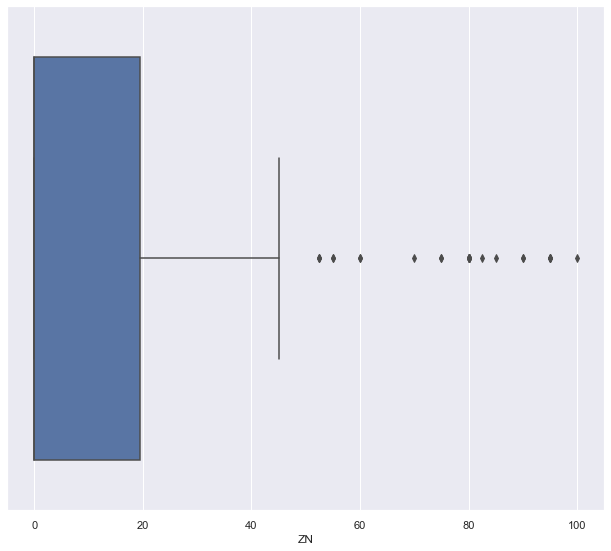

In [89]:
sc.boxplot(train.ZN)

In [94]:
model9=ols("target~RM+LSTAT+TAX+DIS+PTRATIO+B+ZN",data=train).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     177.2
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          2.54e-110
Time:                        15:04:31   Log-Likelihood:                -950.34
No. Observations:                 354   AIC:                             1917.
Df Residuals:                     346   BIC:                             1948.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.4386      4.077      4.767      0.000      11.419      27.458
RM             3.5190      0.423      8.310      0.000       2.686       4.352
LSTAT         -0.5131      0.043    -11.948      0.000      -0.598      -0.429
TAX           -0.0064      0.002     -3.823      0.000      -0.010      -0.003
DIS           -0.5500      0.151     -3.632      0.000      -0.848      -0.252
PTRATIO       -0.6621      0.112     -5.891      0.000      -0.883      -0.441
B              0.0098      0.002      4.025      0.000       0.005       0.015
ZN             0.0260      0.012      2.136      0.033       0.002       0.050
==============================================================================
Omnibus:                       31.398   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.567
Skew:                           0.515   Prob(JB):                     1.16e-13
Kurtosis:                       4.726   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
predicted_values=model9.predict(X_test)
actual_values=Y_test
error=actual_values-predicted_values
rmse=np.sqrt(np.mean(error**2))
mape=np.mean(abs((actual_values-predicted_values)/actual_values))*100
accuracy=100-mape
print(rmse,mape,accuracy)

3.9198472901971333 14.91065058408967 85.08934941591033
